In [17]:
import pandas as pd
import numpy as np

np.random.seed(42)

rows = 9000

data = {
    "income": np.random.normal(50000, 20000, rows),
    "debts": np.random.normal(15000, 10000, rows),
    "credit_score": np.random.randint(300, 850, rows),
    "employment_years": np.random.randint(0, 35, rows),
    "loan_amount": np.random.normal(20000, 15000, rows),
    "payment_history": np.random.randint(0, 6, rows),
    "age": np.random.randint(18, 70, rows),
    "loan_term": np.random.choice([12, 24, 36, 48, 60], rows)
}

df = pd.DataFrame(data)

# ---------- Target Variable ----------
df["creditworthy"] = np.where(
    (df["credit_score"] > 650) &
    (df["payment_history"] <= 1) &
    (df["income"] > df["loan_amount"] / 2),
    1,
    0
)

# ---------- Introduce Missing Values ----------
for col in df.columns:
    df.loc[df.sample(frac=0.08).index, col] = np.nan

# ---------- Messy Data ----------
df.loc[df.sample(frac=0.03).index, "income"] *= -1   # negative income
df.loc[df.sample(frac=0.03).index, "debts"] *= 5     # extreme debts

df.sample(2)


,income,debts,credit_score,employment_years,loan_amount,payment_history,age,loan_term,creditworthy
3135,58860.042609,19340.684872,469.0,11.0,16726.394368,3.0,32.0,60.0,0.0
2758,NaN,19137.542029,379.0,17.0,26065.495292,4.0,57.0,12.0,0.0


INFO REGARDING COLUMNS


In [ ]:
# info regarding DataFrame
#  income ---> personal income of the applicant    --> Normally Distributed
#  debts ---> total existing debts of the applicant (loan)   -->Not normslly Distributed
#  credit_score  ----> means that pereson's history in returning loans ,wether he returned that on time or not --->Not normally Distributed
#  employment years ---> means for how long he has benn doing his job  --->Not normally distributed
#  Loan_amount -->   The amount of Loan a person is applying(demanding/desiring) for         -----> Normally Distributed      
# payment_history ---> This column indicates the commitmentness of a person like how responsible a person is on returning the loan on time , the value telling how many times a person has delayed his payment --> Not normally Distributed
#  age ---> age of the applicant  --> Not perfectly normally distributed
#  loan_term ---> duration of the loan in months  ---> Not normally Distributed
# creditworthy ---> Target variable indicating if the applicant is creditworthy like wether he is worthy to give loan to or not


EXPLORING DATASET


<Axes: ylabel='Density'>

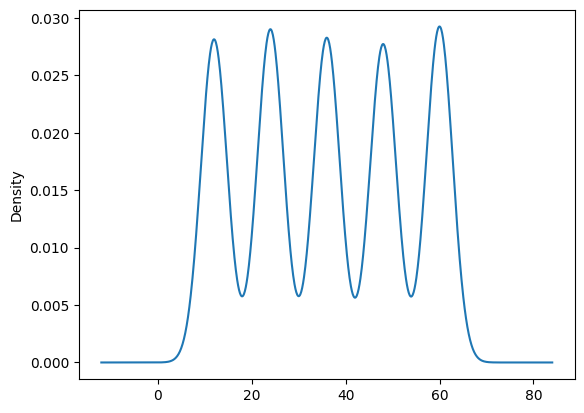

In [19]:
df['loan_term'].plot(kind='kde')

In [20]:
df.sample(2)

,income,debts,credit_score,employment_years,loan_amount,payment_history,age,loan_term,creditworthy
8580,53478.944168,29022.095895,361.0,23.0,32204.782041,1.0,51.0,24.0,0.0
668,-3019.396168,5750.741843,725.0,4.0,NaN,1.0,41.0,36.0,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   income            8280 non-null   float64
 1   debts             8280 non-null   float64
 2   credit_score      8280 non-null   float64
 3   employment_years  8280 non-null   float64
 4   loan_amount       8280 non-null   float64
 5   payment_history   8280 non-null   float64
 6   age               8280 non-null   float64
 7   loan_term         8280 non-null   float64
 8   creditworthy      8280 non-null   float64
dtypes: float64(9)
memory usage: 632.9 KB


In [22]:
(df.isnull().sum())/len(df)

,0
income,0.08
debts,0.08
credit_score,0.08
employment_years,0.08
loan_amount,0.08
payment_history,0.08
age,0.08
loan_term,0.08
creditworthy,0.08


In [23]:
df.isnull().any()

,0
income,True
debts,True
credit_score,True
employment_years,True
loan_amount,True
payment_history,True
age,True
loan_term,True
creditworthy,True


In [24]:
df.describe()

,income,debts,credit_score,employment_years,loan_amount,payment_history,age,loan_term,creditworthy
count,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000
mean,46719.729536,16961.989294,574.497222,17.049396,19904.361375,2.485749,43.286594,36.079710,0.122585
std,26714.018881,17093.930888,159.982715,10.143807,15001.955147,1.711331,14.960620,17.015924,0.327980
min,-109705.180052,-73418.421512,300.000000,0.000000,-39423.693520,0.000000,18.000000,12.000000,0.000000
25%,34751.134545,8568.486931,436.000000,8.000000,10008.847689,1.000000,30.000000,24.000000,0.000000
50%,49049.179413,15403.683196,574.000000,17.000000,19909.747563,3.000000,43.000000,36.000000,0.000000
75%,62820.351144,22358.174341,712.000000,26.000000,29860.172583,4.000000,56.000000,48.000000,0.000000
max,128524.754129,243888.412064,849.000000,34.000000,81491.754994,5.000000,69.000000,60.000000,1.000000


<Axes: xlabel='creditworthy', ylabel='income'>

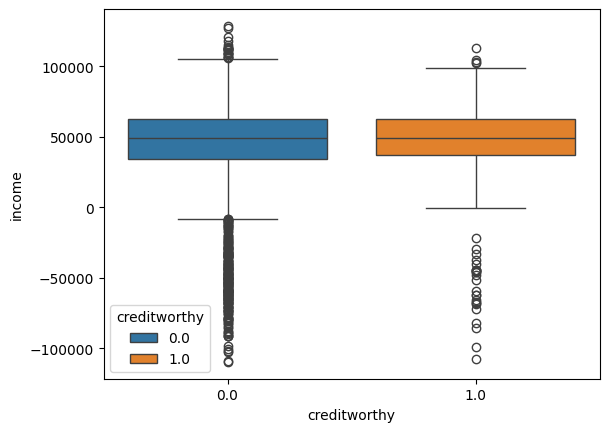

In [25]:
sns.boxplot(x=df['creditworthy'],y=df['income'],hue=df['creditworthy'])  

<Axes: >

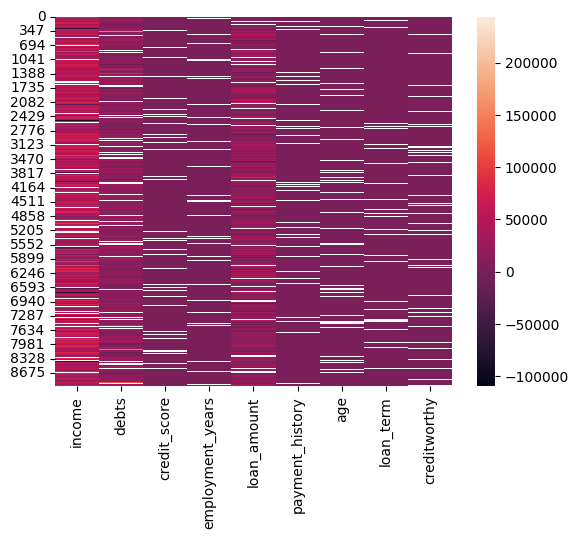

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df)

In [27]:
df.dropna().shape

(4261, 9)

In [28]:
df.head(1)

,income,debts,credit_score,employment_years,loan_amount,payment_history,age,loan_term,creditworthy
0,59934.28306,22654.02156,813.0,8.0,15537.525878,3.0,20.0,12.0,NaN


<Axes: xlabel='creditworthy', ylabel='debts'>

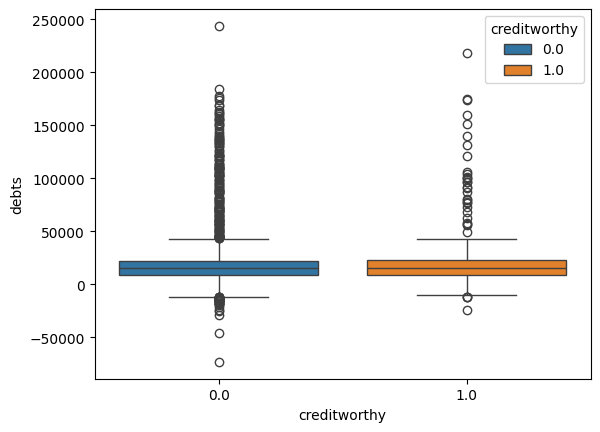

In [29]:
sns.boxplot(x=df['creditworthy'],y=df['debts'],hue=df['creditworthy'])

In [30]:
df['income']

,income
0,59934.283060
1,47234.713977
2,62953.770762
3,80460.597128
4,45316.932506
...,...
8995,52032.601071
8996,73344.354666
8997,81768.943525
8998,36300.256417


INCOME_COLUMN_Exploring + PROBLEMS_writing


In [31]:
df['income'].sample( 5)

,income
1595,29805.385906
2406,24008.375261
8119,50210.914235
3905,NaN
926,38821.563055


<Axes: ylabel='Density'>

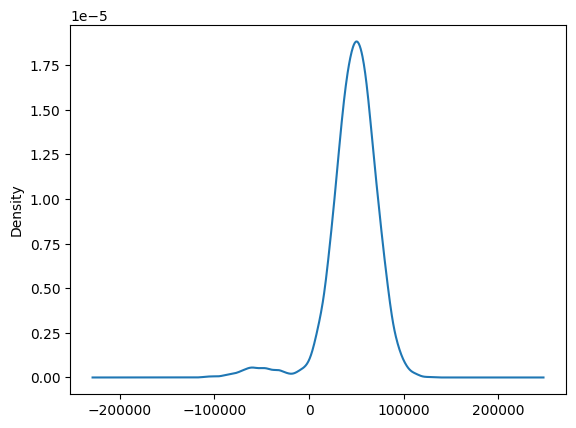

In [32]:
df['income'].plot(kind='kde')

<Axes: ylabel='income'>

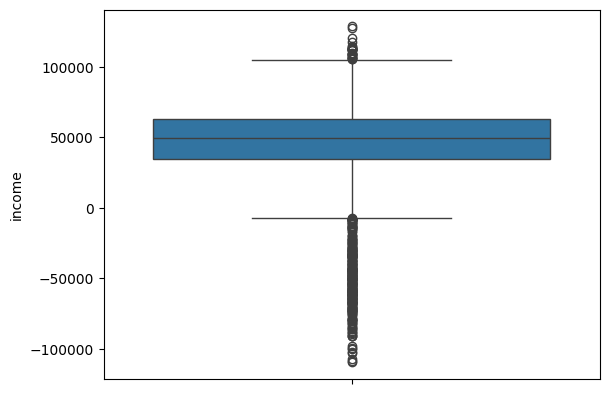

In [33]:
sns.boxplot(df['income'])
#  will have to handle these -ive numeric income values ,thses may be of the mistyping of the data entry operators

Debth COLUMN'S EXPLORING

In [34]:
df['debts'].describe()
# min value is in -ve , so we will have to handle these -ive debt values , these may be of the mistyping of the data entry operators

,debts
count,8280.000000
mean,16961.989294
std,17093.930888
min,-73418.421512
25%,8568.486931
50%,15403.683196
75%,22358.174341
max,243888.412064


In [35]:
df['debts'].sample(5)

,debts
6432,7310.400873
526,3110.588819
5281,29242.834143
3166,8096.481339
433,8631.235258


<Axes: >

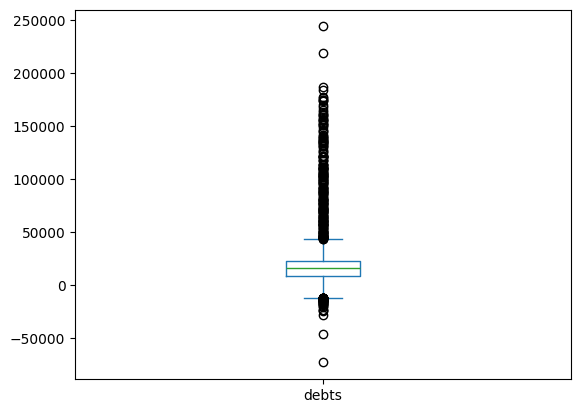

In [36]:
df['debts'].plot(kind='box')

<Axes: xlabel='creditworthy', ylabel='debts'>

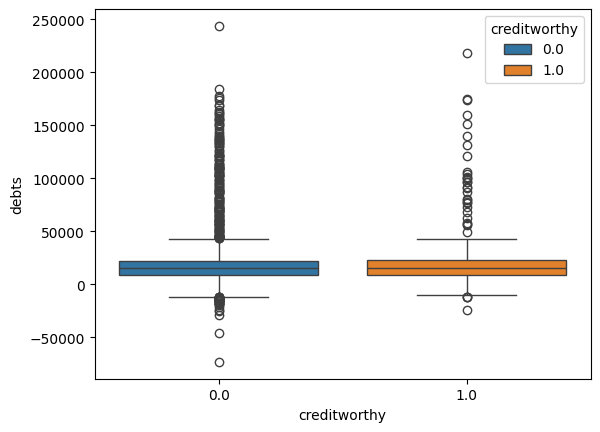

In [37]:
import seaborn as sns
sns.boxplot(x=df['creditworthy'],y=df['debts'],hue=df['creditworthy'])

In [38]:
df[df['debts'].isnull()]

,income,debts,credit_score,employment_years,loan_amount,payment_history,age,loan_term,creditworthy
16,29743.377593,NaN,583.0,19.0,23152.617889,2.0,68.0,60.0,0.0
26,26980.128452,NaN,623.0,14.0,-17420.662225,4.0,27.0,24.0,0.0
29,44166.125004,NaN,695.0,26.0,17921.318730,5.0,19.0,48.0,0.0
49,14739.196893,NaN,NaN,16.0,56990.730662,1.0,28.0,24.0,0.0
67,70070.657958,NaN,763.0,13.0,23290.314627,2.0,50.0,24.0,NaN
...,...,...,...,...,...,...,...,...,...
8919,66518.471661,NaN,709.0,18.0,21508.073400,3.0,31.0,12.0,0.0
8920,83666.291519,NaN,797.0,5.0,13708.593523,4.0,53.0,24.0,0.0
8932,50447.011099,NaN,834.0,12.0,-8148.785598,NaN,40.0,60.0,1.0
8939,46934.788932,NaN,762.0,5.0,-1634.794235,1.0,26.0,24.0,1.0


CREDIT_SCORE_COLUMN

In [39]:
df['credit_score'].describe()

,credit_score
count,8280.000000
mean,574.497222
std,159.982715
min,300.000000
25%,436.000000
50%,574.000000
75%,712.000000
max,849.000000


<Axes: xlabel='creditworthy', ylabel='credit_score'>

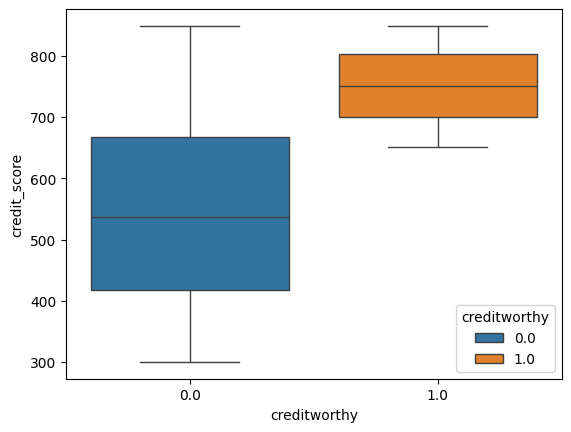

In [40]:
sns.boxplot(x=df['creditworthy'],y=df['credit_score'],hue=df['creditworthy'])
# Means the people with high credit score value i.e in the range of generally 700-850 are prioritizing to be given the loan

EMPLOYMENT_YEARS 

In [41]:
df['employment_years'].sample(5)

,employment_years
2454,1.0
8876,31.0
425,26.0
419,3.0
1303,0.0


((array([-3.76369681, -3.53590354, -3.41071899, ...,  3.41071899,
          3.53590354,  3.76369681]),
  array([ 0.,  0.,  0., ..., 34., 34., 34.])),
 (np.float64(9.898831455584649),
  np.float64(17.049396135265695),
  np.float64(0.9754947705269238)))

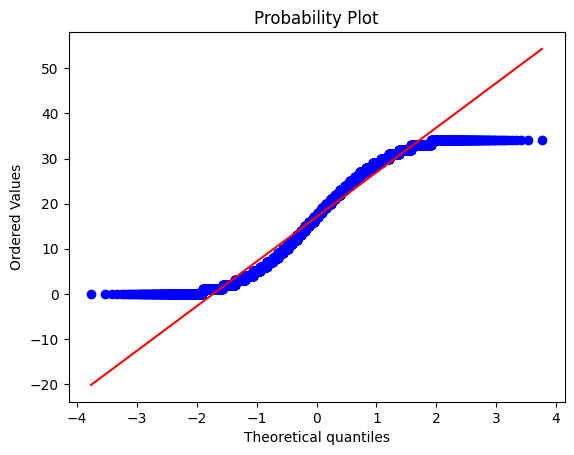

In [71]:
stats.probplot(df['employment_years'].dropna(), dist="norm", plot=plt)

In [43]:
df['employment_years'].skew()

np.float64(-0.01927102464480814)

<Axes: xlabel='creditworthy', ylabel='employment_years'>

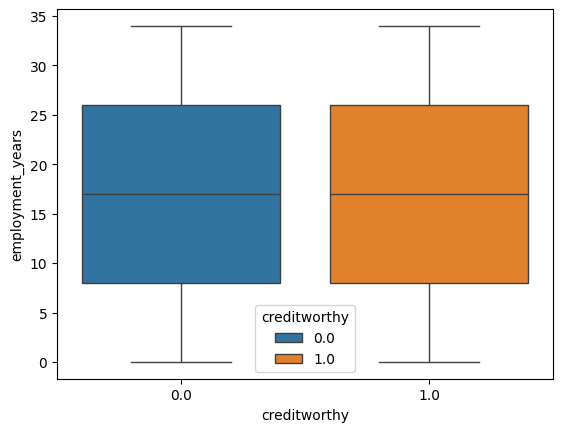

In [44]:
sns.boxplot(x=df['creditworthy'],y=df['employment_years'],hue=df['creditworthy'])
# means the "years_of_experience" didnot effect the worthiness that much 

LOAN_AMOUNT

In [45]:
df['loan_amount'].describe() #  -=--> Min value is -ve , so we will have to handle these -ive loan_amount values

,loan_amount
count,8280.000000
mean,19904.361375
std,15001.955147
min,-39423.693520
25%,10008.847689
50%,19909.747563
75%,29860.172583
max,81491.754994


In [46]:
df['loan_amount'].sample(5)

,loan_amount
8655,13881.515869
8062,NaN
5524,27952.508799
5430,10152.971096
1325,9620.554908


np.float64(0.002316742173636103)

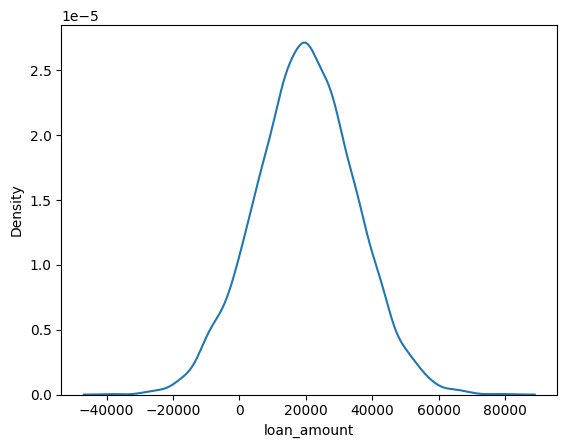

In [47]:
sns.kdeplot(df['loan_amount'])
df['loan_amount'].skew()   # Normally distributed with a slight right skew

<Axes: xlabel='creditworthy', ylabel='loan_amount'>

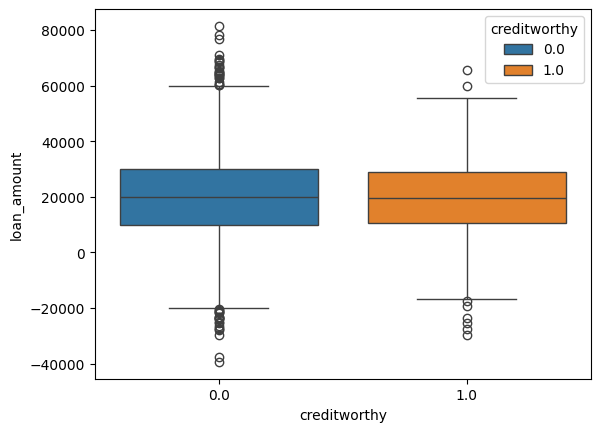

In [48]:
sns.boxplot(x=df['creditworthy'],y=df['loan_amount'],hue=df['creditworthy'])  

PAYMENT_HISTORY

In [70]:
df.head(1)

,income,debts,credit_score,employment_years,loan_amount,payment_history,age,loan_term,creditworthy
0,59934.28306,22654.02156,813.0,8.0,15537.525878,3.0,20.0,12.0,NaN


In [50]:
df['payment_history'].describe()

,payment_history
count,8280.000000
mean,2.485749
std,1.711331
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,5.000000


<Axes: xlabel='creditworthy', ylabel='payment_history'>

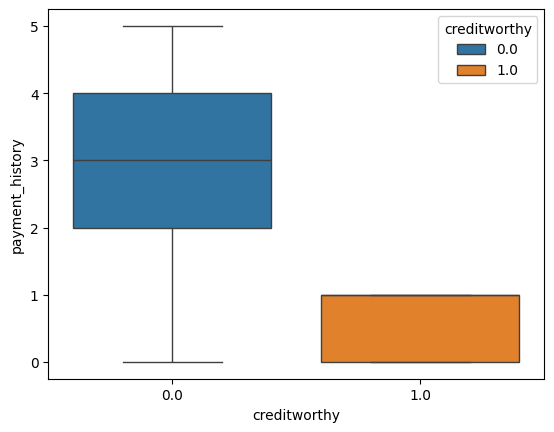

In [49]:
sns.boxplot(x=df['creditworthy'],y=df['payment_history'],hue=df['creditworthy'])

In [51]:
df['payment_history'].corr(df['creditworthy'])
# payment_history means the number of times a person has delayed his/her payment , so the positive correlation means that the more the number of delays in payment the less creditworthy a person is

np.float64(-0.43155969516041254)

<Axes: >

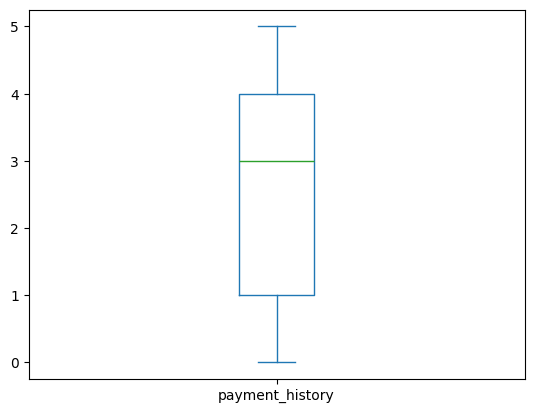

In [53]:
df['payment_history'].plot(kind='box') # No outliers are out there

<Axes: xlabel='payment_history', ylabel='Count'>

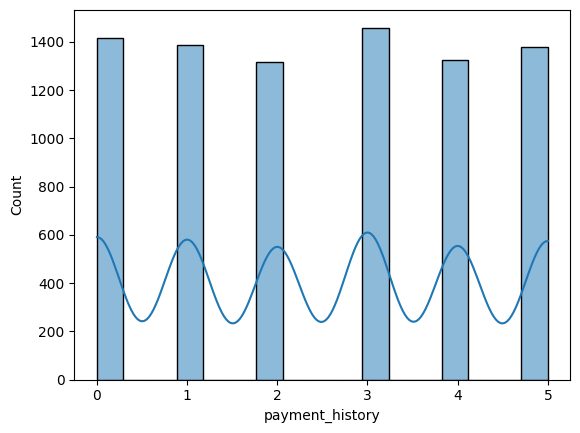

In [73]:
sns.histplot(df['payment_history'],kde=True)

AGE_COLUMN

In [58]:
df['age'].describe()

,age
count,8280.000000
mean,43.286594
std,14.960620
min,18.000000
25%,30.000000
50%,43.000000
75%,56.000000
max,69.000000


((array([-3.76369681, -3.53590354, -3.41071899, ...,  3.41071899,
          3.53590354,  3.76369681]),
  array([18., 18., 18., ..., 69., 69., 69.])),
 (np.float64(14.62623377841405),
  np.float64(43.28659420289855),
  np.float64(0.9772933214880031)))

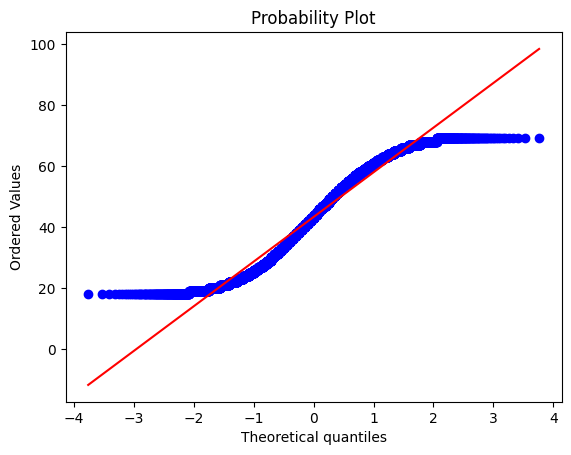

In [75]:
import scipy.stats as stats

stats.probplot(df['age'].dropna(), dist="norm", plot=plt)

In [62]:
df[df['age']<0]

,income,debts,credit_score,employment_years,loan_amount,payment_history,age,loan_term,creditworthy


In [86]:
df['age'].value_counts().sort_index()

,count
age,
18.0,156
19.0,176
20.0,160
21.0,161
22.0,180
23.0,164
24.0,164
25.0,163
26.0,153


LOAN_TERM_COL

In [88]:
df['loan_term'].head(20)

,loan_term
0,12.0
1,12.0
2,12.0
3,12.0
4,36.0
5,24.0
6,60.0
7,48.0
8,12.0
9,60.0


<Axes: ylabel='Frequency'>

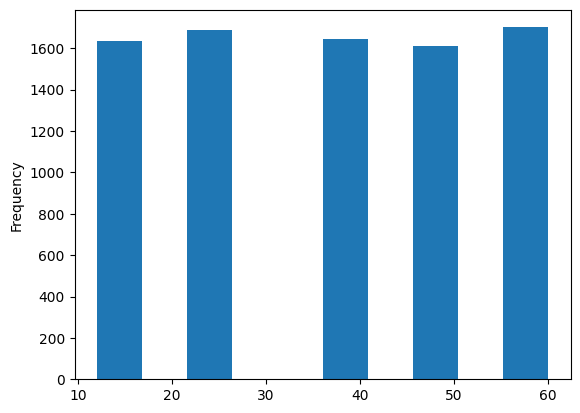

In [91]:
df['loan_term'].plot(kind='hist')

In [92]:
df['loan_term'].describe()

,loan_term
count,8280.000000
mean,36.079710
std,17.015924
min,12.000000
25%,24.000000
50%,36.000000
75%,48.000000
max,60.000000


In [ ]:
a = df['loan'].values
positive_count = 0
negative_count = 0
for i in range(len(a)):
    if a[i] >= 0:
        print('positive')
    else:
        print('negative')
    if a[i] > 0:
        positive_count += 1
    else:
        negative_count += 1
print("Positive count:", positive_count)
print("Negative count:", negative_count)
print(positive_count + negative_count)

    

positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
p